<h1 align="center">
    <img src="https://www.xyzapk.com/wp-content/uploads/2017/11/com.stackexchange.stackoverflow.jpg.png" align="center" width="100"/>
</h1>
    
<h1 align="center">
    stack<b>overflow
    </b></h1>

<h3 align="center"> Mining arguments from stackoverflow questions</h3>

##### Libraries imports

In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt

if '../../src/' not in sys.path:
    sys.path.append('../../src/')
    
from crawler.viz.drawer import GraphDrawer
from crawler.argumentation.convert import common
from crawler.argumentation.mine.from_stack import get_debate_graph

## 1. Building the graphs

### Methodology
The conversation is built retrieving the answers and the comments. Once we have the conversartion we can then start to build the graph.

**Nodes**

We can consider:
 - Each comment a node
 - Each user a node

**Edges**
  - between comments: exists an edge `(u, v)` between two nodes `u, v` if the comment associated to the node `u` is repsonding to the comment associated to the node `v`
  - between users: exists an edge `(u, v)` between two nodes `u, v` if the user of the comment of associated to the node `u` is repsonding to the user of the comment associated to the node `v`

**Weights**

The weight of an edge `(u, v)` is calculated using the text of the comments associated to the nodes `u` and `v`, as follows: </br> `weight = similarity(u,v) * sentiment(u) * sentiment(v)`

**Multiedges joining strategy**

We can decide whether to keep or join together multiple edges between the same two nodes. In case of join we only keep one edge whose weight is the average of the all the weights of the edges between the two nodes


### Parameters
To build the graph we need to set some parameters:
- **`question`** {str} -- Stackoverflow question ID, can be found in the URL
- **`mode`** {str} -- What to use as graph nodes (default: {'comments'})
- **`save`** {bool} -- If True the output graph will be saved on the file system (default: {True})
- **`path`** {str} --  Output path of the generated graph (default: {None})
- **`multiedges`** {bool} -- Whether to leave (True) or join (False) multiple edges between the same two nodes (default: {False})
- **`framework`** {str} -- Type of the output argumentation framework  (default: {common.BWAF})
- **`verbose`** {bool} -- If True some stats will be printed on the standard output (default: {False})

### 1.1. Comments as nodes

In [2]:
%%time
comments_graph = get_debate_graph(
    question='29480099',
    mode='comments',
    save=False,
    multiedges=False,
    framework=common.BWAF,
    verbose=True
)

NUMBER OF NODES IN THE GRAPH:      24
NUMBER OF EDGES IN THE GRAPH:      23
NUMBER OF NULL EDGES IN THE GRAPH: 5 

CPU times: user 527 ms, sys: 36.8 ms, total: 564 ms
Wall time: 9.47 s


### 1.2. Users as nodes

In [3]:
%%time
users_graph = get_debate_graph(
    question='29480099',
    mode='users',
    save=False,
    multiedges=False,
    framework=common.BWAF,
    verbose=True
)

NUMBER OF NODES IN THE GRAPH:      20
NUMBER OF EDGES IN THE GRAPH:      21
NUMBER OF NULL EDGES IN THE GRAPH: 3 

CPU times: user 527 ms, sys: 38.1 ms, total: 565 ms
Wall time: 9.38 s


## 2. Visualization
Arguments and relationships visualized as a directed graph. We visualize the weights only for the second graph because it has less nodes

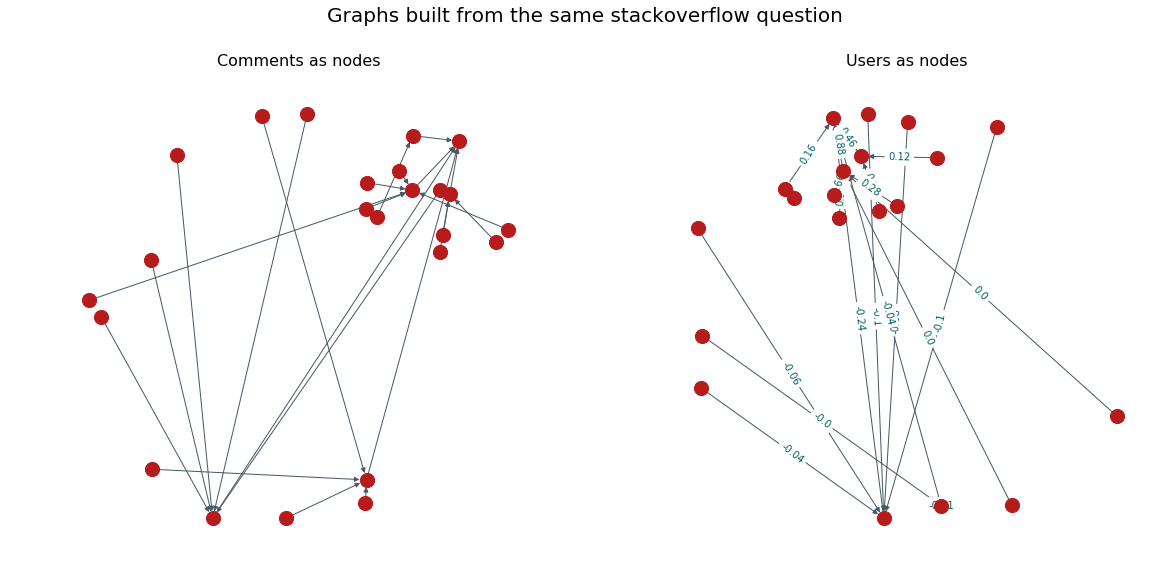

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,9))
fig.suptitle('Graphs built from the same stackoverflow question', fontsize=20)

comments_drawer = GraphDrawer(comments_graph)
users_drawer = GraphDrawer(users_graph, draw_edge_labels=True)

comments_drawer.draw(ax1, 'Comments as nodes')
users_drawer.draw(ax2, 'Users as nodes')